In [1]:
import os
import sys
import pickle
import random
import pandas as pd
from tqdm import tqdm
import cv2
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt




from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, LabelBinarizer
# from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import *

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
# from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array,load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, regularizers, mixed_precision
from tensorflow.keras.applications import InceptionV3, ResNet50, ResNet101, InceptionResNetV2, VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, UpSampling2D, concatenate, Activation,GlobalAveragePooling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.layers import *

In [2]:
import pandas as pd

def detect_faultsdfalone(model, image_path, class_names, img_size=256, threshold=0.2):
    """
    Detects faults in a wind turbine blade image using a trained CNN model.

    Args:
    - model: Trained Keras model object
    - image_path: File path of the input image or directory
    - class_names: List of class names (in order of model output)
    - img_size: Image size to resize to (default 256)
    - threshold: Prediction threshold (default 0.2)

    Returns:
    - df: Pandas dataframe with columns 'Image', 'Ground Truth Label', 'Predicted Label', 'Confidence'
    """
    
    sepps = os.path.sep
    
    image_paths = get_image_paths(image_path)

    all_predictions = []

    for i, path in enumerate(image_paths):
        image = cv2.imread(path)
        image = cv2.resize(image, (img_size, img_size))
        image = np.expand_dims(image, axis=0) / 255.
        
        

        start_time = time.time()
        predictions = model.predict(image)
        end_time = time.time()

        prediction_time = end_time - start_time
        prediction_time_in_sec = f"{prediction_time:.2f}"

        pred_labels = []
        confidences = []  

        for j, prediction in enumerate(predictions[0]):
            if prediction >= threshold:
                pred_labels.append(class_names[j])
                confidences.append(prediction)
                
        gt_label = path.split(os.path.sep)[-2]
        pred_label = ','.join(pred_labels) if pred_labels else 'None'
        confidence = ','.join([f'{c:.2f}' for c in confidences]) if confidences else 'None'

        all_predictions.append((os.path.basename(path), gt_label, pred_label, confidence,prediction_time_in_sec))
            
    # df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence'])    
    df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)'])
    
    df_split = df.assign(Ground_Truth_Label=df['Ground Truth Label']).assign(Predicted_Label=df['Predicted Label'].str.split(',')).explode('Predicted_Label')
    count = len(df_split[df_split['Ground_Truth_Label'] == df_split['Predicted_Label']])
    countb = len(df_split[df_split['Ground_Truth_Label'] != df_split['Predicted_Label']])
    # count number of rows with one predicted label
    one_label = (df['Predicted Label'].str.count(',') == 0).sum()
    # count number of rows with more than one predicted label
    more_labels = (df['Predicted Label'].str.count(',') > 0).sum()
    
    total_Images = df.shape[0]
    total_Predictions = df_split.shape[0]
    # Assuming the variables are already defined
    print(f"\n\n\nNumber of rows with one predicted label: {one_label}")
    print(f"Number of rows with more than one predicted label: {more_labels}")
    print(f"Total Images label: {total_Images}")
    print(f"Total predicted label: {total_Predictions}")

    print(f"Total predictions that match each Ground Truth: {count}")
    print(f"Total predictions that do not match each Ground Truth: {countb}")

    # Calculate percentage of accuracy and wrong predictions
    accuracy = (count / total_Predictions) * 100
    wrong_predictions = (countb / total_Predictions) * 100

    print(f"Percentage of accuracy: {accuracy:.2f}%")
    print(f"Percentage of wrong predictions: {wrong_predictions:.2f}%\n\n")

    # Save the DataFrame to the CSV file
    df.to_csv('SamplePredicted.csv', index=False)

    return df



def load_data_generator(datagen, data_dir, subdir, img_size = 244, batch_size = 32):
    if subdir != 'test':
        shuffles=True
    else:
        shuffles=False
    return datagen.flow_from_directory(
        os.path.join(data_dir, subdir),
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = shuffles
        # class_mode='categorical'
    )


def get_file_list(data_folder):
    return [os.path.join(dirpath, file) for dirpath, dirnames, files in os.walk(data_folder) for file in files]


def get_image_paths(image_path):
    if isinstance(image_path, list):
        image_pathss = image_path
    elif os.path.isdir(image_path):
        image_pathss = [os.path.join(root, file)
                       for root, dirs, files in os.walk(image_path)
                       for file in files
                       if file.endswith((".jpg", ".jpeg", ".png"))]
    else:
        image_pathss = [image_path]
    return image_pathss


In [3]:
import nbimporter
import import_ipynb


import os
import sys

def add_path_to_sys(path):
    module_path = os.path.abspath(path)
    if module_path not in sys.path:
        sys.path.append(module_path)

usePath = os.path.join(r'c:', os.sep,'Users','scrwh','Documents','PythonScripts')
add_path_to_sys(usePath)


import ModelsListDiffFuntionsB
from ModelsListDiffFuntionsB import *

# List all the functions defined in the other notebook
print(dir(ModelsListDiffFuntionsB))

['AbstractRNNCell', 'Activation', 'ActivityRegularization', 'Adam', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'ConfusionMatrixDisplay', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'Dense', 'DenseFeatures', 'DepthwiseConv1D', 'DepthwiseConv2D', 'DetCurveDisplay', 'Discretization', 'DistanceMetric', 'Dot', 'Dropout', 'ELU', 'EarlyStopping', 'EinsumDense', 'Embedding', 'EvaluateTest', 'FileTree', 'Flatten', 'FolderTree', 'GPUtil', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'GlobalAveragePooli

In [4]:
# load the saved model
Inception_ResNet_V2_model = load_model('Models/TrainingData_2023-03-06 0523/wind_turbine_Inception-ResNet-V2_model_2023-03-06 1602.h5')
# load the saved history
with open('Models/TrainingData_2023-03-06 0523/wind_turbine_Inception-ResNet-V2_history_2023-03-06 1602.pkl', 'rb') as f:
    Inception_ResNet_V2_history = pickle.load(f)

In [5]:
data_folder = check_folder = os.path.join('..', 'data', 'data4d')
check_folder = os.path.join('..', 'data', 'data4c','test')
check_folderB = os.path.join('Synthetic_data', 'Fault_types - Copy (2)')

# C:\Users\scrwh\Documents\PythonScripts\Master_Thesis\Function\Synthetic_data\Fault_types - Copy (2)

print(len(check_folderB))
# C:\Users\scrwh\Documents\PythonScripts\Master_Thesis\data\data4b\check

batch_size=32
epochs=50
img_size=244

# Retrieve input image size
# img_size = Inception_ResNet_V2_model.layers[0].input_shape[1]

val_datagen = ImageDataGenerator(
    rescale=1./255
)
# test_generator = load_data_generator(val_datagen, data_folder, 'test')
test_generator = load_data_generator(val_datagen, data_folder, 'test', img_size = img_size, batch_size = batch_size)



num_classes = len(test_generator.class_indices)
# labels = train_generator.class_indices
labels = list(test_generator.class_indices.keys())

37
Found 2907 images belonging to 9 classes.


In [6]:
def get_random_samples(directory, num_samples, seed=1234, replace=0):
    """
    Get m random samples from n sub-directories of a directory, ensuring at least one sample is chosen from each sub-directory
    """
    if seed is not None:
        random.seed(seed)
        
    subdirectories = [subdir for subdir in os.listdir(directory) if os.path.isdir(os.path.join(directory, subdir))]
    num_subdirectories = len(subdirectories)
    samples = []
    
    # Ensure at least one sample is chosen from each sub-directory
    for subdir in subdirectories:
        files = os.listdir(os.path.join(directory, subdir))
        if files:
            file = os.path.join(directory, subdir, random.choice(files))
            samples.append(file)
    
    # Remove duplicates from the list of samples
    samples = list(set(samples))
    
    # Choose remaining samples, allowing for replacement if necessary
    while len(samples) < num_samples:
        subdir = random.choice(subdirectories)
        files = os.listdir(os.path.join(directory, subdir))
        if files:
            file = os.path.join(directory, subdir, random.choice(files))
            if replace or file not in samples:
                samples = list(set(samples))
                samples.append(file)
    
    return samples


In [7]:

all_filesc = get_file_list(check_folderB)
len(all_filesc)

808

In [8]:
seed = 12345678901234567
imglist =  get_random_samples(check_folderB, 100,seed) # random.sample(all_filesc, 20)
# imglist

To calculate TP, TN, FP, and FN in multiple class image predictions, we need to define some terms first. Suppose we have a binary classification problem where we want to classify images into two classes: positive and negative. The positive class is the one we are interested in detecting, and the negative class is everything else. Then, we can define the following:

    True positives (TP): The number of positive samples that are correctly classified as positive.
    True negatives (TN): The number of negative samples that are correctly classified as negative.
    False positives (FP): The number of negative samples that are incorrectly classified as positive.
    False negatives (FN): The number of positive samples that are incorrectly classified as negative.

In the case of multiple class image predictions, we need to extend these definitions to account for multiple classes. One way to do this is to calculate the TP, TN, FP, and FN for each class separately. For example, suppose we have three classes: A, B, and C. We can define the following:

    True positives for class A (TP_A): The number of samples that belong to class A and are correctly classified as class A.
    True negatives for class A (TN_A): The number of samples that do not belong to class A and are correctly classified as not class A.
    False positives for class A (FP_A): The number of samples that do not belong to class A and are incorrectly classified as class A.
    False negatives for class A (FN_A): The number of samples that belong to class A and are incorrectly classified as not class A.

We can repeat this process for each class, so we end up with TP, TN, FP, and FN for each class.

To calculate the TPR and FPR, we need to sum up the TP, TN, FP, and FN across all classes. We can then define:

    True positive rate (TPR): TP / (TP + FN)
    False positive rate (FPR): FP / (FP + TN)

Here's an example implementation of how to calculate TP, TN, FP, and FN for multiple class image predictions:

In [9]:
def detect_faultsdfaloneb(model, image_path, class_names, img_size=256, threshold=0.2):
    sepps = os.path.sep

    image_paths = get_image_paths(image_path)
    num_images = len(image_paths)

    all_predictions = []

    for i, path in enumerate(image_paths):
        image = cv2.imread(path)
        image = cv2.resize(image, (img_size, img_size))
        image = np.expand_dims(image, axis=0) / 255.

        start_time = time.time()
        predictions = model.predict(image)
        end_time = time.time()

        prediction_time = end_time - start_time
        prediction_time_in_sec = f"{prediction_time:.2f}"

        pred_labels = []
        confidences = []

        for j, prediction in enumerate(predictions[0]):
            if prediction >= threshold:
                pred_labels.append(class_names[j])
                confidences.append(prediction)

        gt_label = path.split(os.path.sep)[-2]
        pred_label = ','.join(pred_labels) if pred_labels else 'None'
        confidence = ','.join([f'{c:.2f}' for c in confidences]) if confidences else 'None'

        all_predictions.append((os.path.basename(path), gt_label, pred_label, confidence, prediction_time_in_sec))

    df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)'])

    df_split = df.assign(Ground_Truth_Label=df['Ground Truth Label']).assign(Predicted_Label=df['Predicted Label'].str.split(',')).explode('Predicted_Label')
    count = len(df_split[df_split['Ground_Truth_Label'] == df_split['Predicted_Label']])
    countb = len(df_split[df_split['Ground_Truth_Label'] != df_split['Predicted_Label']])
    # count number of rows with one predicted label
    one_label = (df['Predicted Label'].str.count(',') == 0).sum()
    # count number of rows with more than one predicted label
    more_labels = (df['Predicted Label'].str.count(',') > 0).sum()
    
    total_Images = df.shape[0]
    total_Predictions = df_split.shape[0]
    # Assuming the variables are already defined
    print(f"\n\n\nNumber of rows with one predicted label: {one_label}")
    print(f"Number of rows with more than one predicted label: {more_labels}")
    print(f"Total Images label: {total_Images}")
    print(f"Total predicted label: {total_Predictions}")

    print(f"Total predictions that match each Ground Truth: {count}")
    print(f"Total predictions that do not match each Ground Truth: {countb}")

    # Calculate percentage of accuracy and wrong predictions
    accuracy = (count / total_Predictions) * 100
    wrong_predictions = (countb / total_Predictions) * 100

    print(f"Percentage of accuracy: {accuracy:.2f}%")
    print(f"Percentage of wrong predictions: {wrong_predictions:.2f}%\n\n")

    # Calculate TP, FP, TN, FN for each image
    for image_name, df_image in df_split.groupby('Image'):
        gt_labels = set(df_image['Ground_Truth_Label'].values)
        pred_labels = set(df_image['Predicted_Label'].values)
        TP = len(gt_labels.intersection(pred_labels))
        FP = len(pred_labels - gt_labels)
        TN = 0
        # FN = 0
        FN = len(gt_labels - pred_labels)
        df.loc[df['Image'] == image_name, 'TP'] = TP
        df.loc[df['Image'] == image_name, 'FP'] = FP
        df.loc[df['Image'] == image_name, 'TN'] = TN
        df.loc[df['Image'] == image_name, 'FN'] = FN

    # Calculate TPR and FPR
    TP = df['TP'].sum()
    FP = df['FP'].sum()
    TN = df['TN'].sum()
    FN = df['FN'].sum()



    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    misclassification = 1 - accuracy
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)

    print(f"TP: {TP:.2f}")
    print(f"FP: {FP:.2f}")
    print(f"TN: {TN:.2f}")
    print(f"FN: {FN:.2f}")
    print(f"TPR: {TPR:.2f}")
    print(f"FPR: {FPR:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Misclassification: {misclassification:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"specificity: {specificity:.2f}")

    # Save the DataFrame to the CSV file
    df.to_csv(f'SamplePredict{num_images}Immages.csv', index=False)

    # Create confusion matrix
    cm = confusion_matrix(df_split['Ground_Truth_Label'], df_split['Predicted_Label'])
        # Convert confusion matrix to a dataframe
    cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)
    cm_df.to_csv('SamplePredictionsConfusionMatrix.csv')
    
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cm, cmap='Blues')  # Change the color map
    ax.set_title('Confusion Matrix', fontsize=16)  # Increase title font size
    ax.set_xlabel('Predicted labels', fontsize=14)  # Increase label font size
    ax.set_ylabel('Ground Truth labels', fontsize=14)  # Increase label font size
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ax.set_xticklabels(class_names, fontsize=12)  # Decrease tick label font size    
    ax.set_xticklabels(class_names, fontsize=12, rotation=15, ha='right')  # Decrease tick label font size and rotate xticklabels
    ax.set_yticklabels(class_names, fontsize=12)  # Decrease tick label font size

    # Add text to each cell with different font colors based on the background intensity
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text_color = 'white' if cm[i, j] > cm.max() / 2 else 'black'  # Choose font color based on background intensity
            ax.text(j, i, cm[i, j], ha='center', va='center', color=text_color, fontsize=14)

    plt.savefig('SamplePredictionsConfusionMatrix.png', bbox_inches='tight')
    plt.show()

    return df



1/1 [==============================] - 0s 41ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18


TP: 95.00
FP: 18.00
TN: 0.00
FN: 5.00
TPR: 0.95
FPR: 1.00
Accuracy: 0.81
Misclassification: 0.19
Precision: 0.84
recall: 0.95
specificity: 0.00


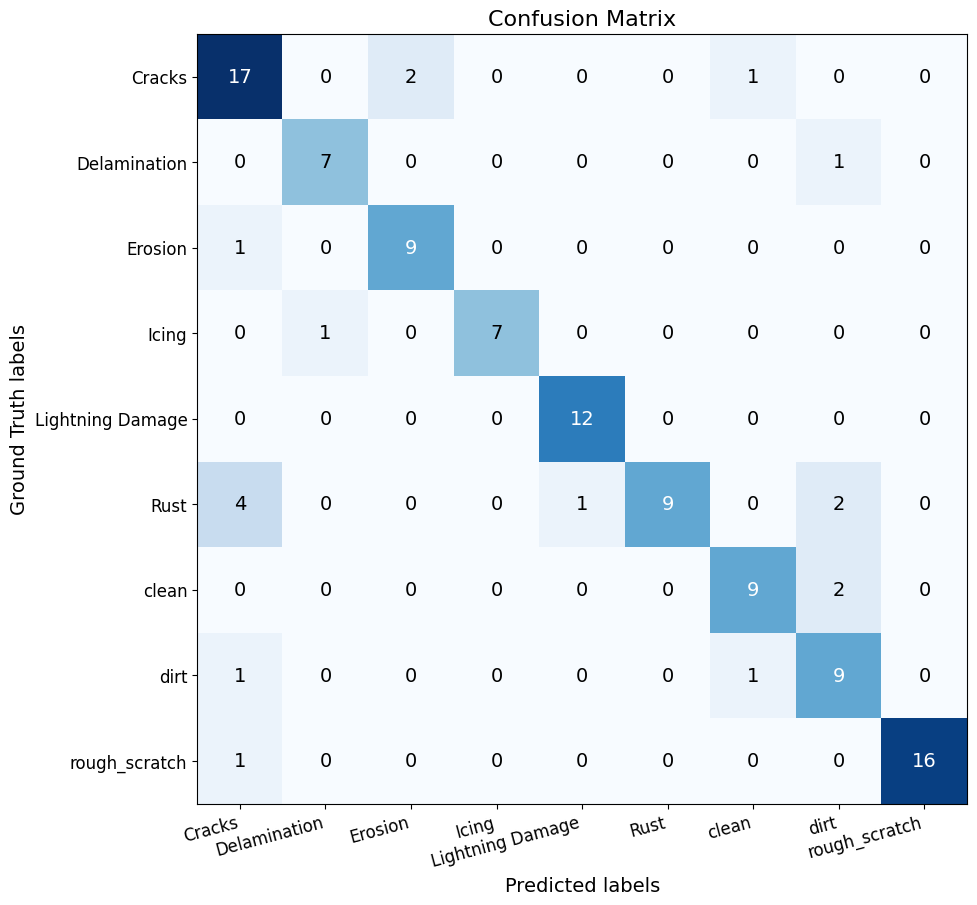

In [10]:
df3 = detect_faultsdfaloneb(Inception_ResNet_V2_model, imglist,labels,img_size)

In [12]:
df3.shape[0]

100

##### Image "Cracks":

- True Positive (TP): 17 (correctly predicted as "Cracks")
- False Negative (FN): 3 (misclassified as something else)
- False Positive (FP): 6 (other images classified as "Cracks")
- True Negative (TN): 64 (correctly predicted as not "Cracks")

In [43]:
def detect_faultsdfaloneb(model, image_path, class_names, img_size=256, threshold=0.2):
    sepps = os.path.sep

    image_paths = get_image_paths(image_path)

    all_predictions = []

    for i, path in enumerate(image_paths):
        image = cv2.imread(path)
        image = cv2.resize(image, (img_size, img_size))
        image = np.expand_dims(image, axis=0) / 255.

        start_time = time.time()
        predictions = model.predict(image)
        end_time = time.time()

        prediction_time = end_time - start_time
        prediction_time_in_sec = f"{prediction_time:.2f}"

        pred_labels = []
        confidences = []

        for j, prediction in enumerate(predictions[0]):
            if prediction >= threshold:
                pred_labels.append(class_names[j])
                confidences.append(prediction)

        gt_label = path.split(os.path.sep)[-2]
        pred_label = ','.join(pred_labels) if pred_labels else 'None'
        confidence = ','.join([f'{c:.2f}' for c in confidences]) if confidences else 'None'

        all_predictions.append((os.path.basename(path), gt_label, pred_label, confidence, prediction_time_in_sec))

    df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)'])

    df_split = df.assign(Ground_Truth_Label=df['Ground Truth Label']).assign(Predicted_Label=df['Predicted Label'].str.split(',')).explode('Predicted_Label')
    count = len(df_split[df_split['Ground_Truth_Label'] == df_split['Predicted_Label']])
    countb = len(df_split[df_split['Ground_Truth_Label'] != df_split['Predicted_Label']])
    # count number of rows with one predicted label
    one_label = (df['Predicted Label'].str.count(',') == 0).sum()
    # count number of rows with more than one predicted label
    more_labels = (df['Predicted Label'].str.count(',') > 0).sum()

    
    total_Images = df.shape[0]
    total_Predictions = df_split.shape[0]
    # Assuming the variables are already defined
    print(f"\n\n\nNumber of rows with one predicted label: {one_label}")
    print(f"Number of rows with more than one predicted label: {more_labels}")
    print(f"Total Images label: {total_Images}")
    print(f"Total predicted label: {total_Predictions}")

    print(f"Total predictions that match each Ground Truth: {count}")
    print(f"Total predictions that do not match each Ground Truth: {countb}")

    # Calculate percentage of accuracy and wrong predictions
    accuracy = (count / total_Predictions) * 100
    wrong_predictions = (countb / total_Predictions) * 100

    print(f"Percentage of accuracy: {accuracy:.2f}%")
    print(f"Percentage of wrong predictions: {wrong_predictions:.2f}%\n\n")

    # Calculate TP, FP, TN, FN for each image
    for image_name, df_image in df_split.groupby('Image'):
        gt_labels = set(df_image['Ground_Truth_Label'].values)
        pred_labels = set(df_image['Predicted_Label'].values)
        TP = len(gt_labels.intersection(pred_labels))
        FP = len(pred_labels - gt_labels)
        TN = 0
        # FN = 0
        FN = len(gt_labels - pred_labels)
        df.loc[df['Image'] == image_name, 'TP'] = TP
        df.loc[df['Image'] == image_name, 'FP'] = FP
        df.loc[df['Image'] == image_name, 'TN'] = TN
        df.loc[df['Image'] == image_name, 'FN'] = FN

    # Calculate TPR and FPR
    TP = df['TP'].sum()
    FP = df['FP'].sum()
    TN = df['TN'].sum()
    FN = df['FN'].sum()



    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    misclassification = 1 - accuracy
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    specificity = TN / (TN + FP)

    print(f"TP: {TP:.2f}")
    print(f"FP: {FP:.2f}")
    print(f"TN: {TN:.2f}")
    print(f"FN: {FN:.2f}")
    print(f"TPR: {TPR:.2f}")
    print(f"FPR: {FPR:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Misclassification: {misclassification:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"specificity: {specificity:.2f}")

    # Save the DataFrame to the CSV file
    df.to_csv('SamplePredictedb.csv', index=False)

    # Create confusion matrix
    cm = confusion_matrix(df_split['Ground_Truth_Label'], df_split['Predicted_Label'])
        # Convert confusion matrix to a dataframe
    cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)
    cm_df.to_csv('SamplePredictionsConfusionMatrix.csv')
    
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cm, cmap='Blues')  # Change the color map
    ax.set_title('Confusion Matrix', fontsize=16)  # Increase title font size
    ax.set_xlabel('Predicted label', fontsize=14)  # Increase label font size
    ax.set_ylabel('Ground Truth label', fontsize=14)  # Increase label font size
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ax.set_xticklabels(class_names, fontsize=12)  # Decrease tick label font size    
    ax.set_xticklabels(class_names, fontsize=12, rotation=15, ha='right')  # Decrease tick label font size and rotate xticklabels
    ax.set_yticklabels(class_names, fontsize=12)  # Decrease tick label font size

    # Add text to each cell with different font colors based on the background intensity
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text_color = 'white' if cm[i, j] > cm.max() / 2 else 'black'  # Choose font color based on background intensity
            ax.text(j, i, cm[i, j], ha='center', va='center', color=text_color, fontsize=14)

    plt.savefig('SamplePredictionsConfusionMatrix.png', bbox_inches='tight')
    plt.show()
    
    
    
    # Initialize the results DataFrame
    results_df = pd.DataFrame(columns=['Class', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

    # Iterate over each class
    for class_name in cm_df.columns:

        # Calculate the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) values
        TP = cm_df.loc[class_name, class_name]
        TN = cm_df.values.sum() - TP - cm_df.loc[:, class_name].sum() - cm_df.loc[class_name, :].sum()
        FP = cm_df.loc[:, class_name].sum() - TP
        FN = cm_df.loc[class_name, :].sum() - TP

        # Calculate the true positive rate (TPR) and false positive rate (FPR)
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)

        # # Append the results to the results DataFrame
        # results_df = results_df.append({
        #     'Class': class_name,
        #     'TP': TP,
        #     'TN': TN,
        #     'FP': FP,
        #     'FN': FN,
        #     'TPR': TPR,
        #     'FPR': FPR
        # }, ignore_index=True)
        
        # Append the results to the results DataFrame
        results_df = pd.concat([results_df, pd.DataFrame({
            'Class': [class_name],
            'TP': [TP],
            'TN': [TN],
            'FP': [FP],
            'FN': [FN],
            'TPR': [TPR],
            'FPR': [FPR]
        })], ignore_index=True)

    # Calculate the total true positive rate (TPR) and false positive rate (FPR)
    total_TP = results_df['TP'].sum()
    total_FN = results_df['FN'].sum()
    total_TPR = total_TP / (total_TP + total_FN)

    total_FP = results_df['FP'].sum()
    total_TN = results_df['TN'].sum()
    total_FPR = total_FP / (total_FP + total_TN)    
    


    print(f"total_TP: {total_TP:.2f}")
    print(f"total_FN: {total_FN:.2f}")
    print(f"total_FP: {total_FP:.2f}")
    print(f"total_TN: {total_TN:.2f}")
    print(f"total_TPR: {total_TPR:.2f}")
    print(f"total_FPR: {total_FPR:.2f}")
    
    
    # Print the results
    print(results_df)

    return df



1/1 [==============================] - 0s 32ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18


TP: 95.00
FP: 18.00
TN: 0.00
FN: 5.00
TPR: 0.95
FPR: 1.00
Accuracy: 0.81
Misclassification: 0.19
Precision: 0.84
recall: 0.95
specificity: 0.00


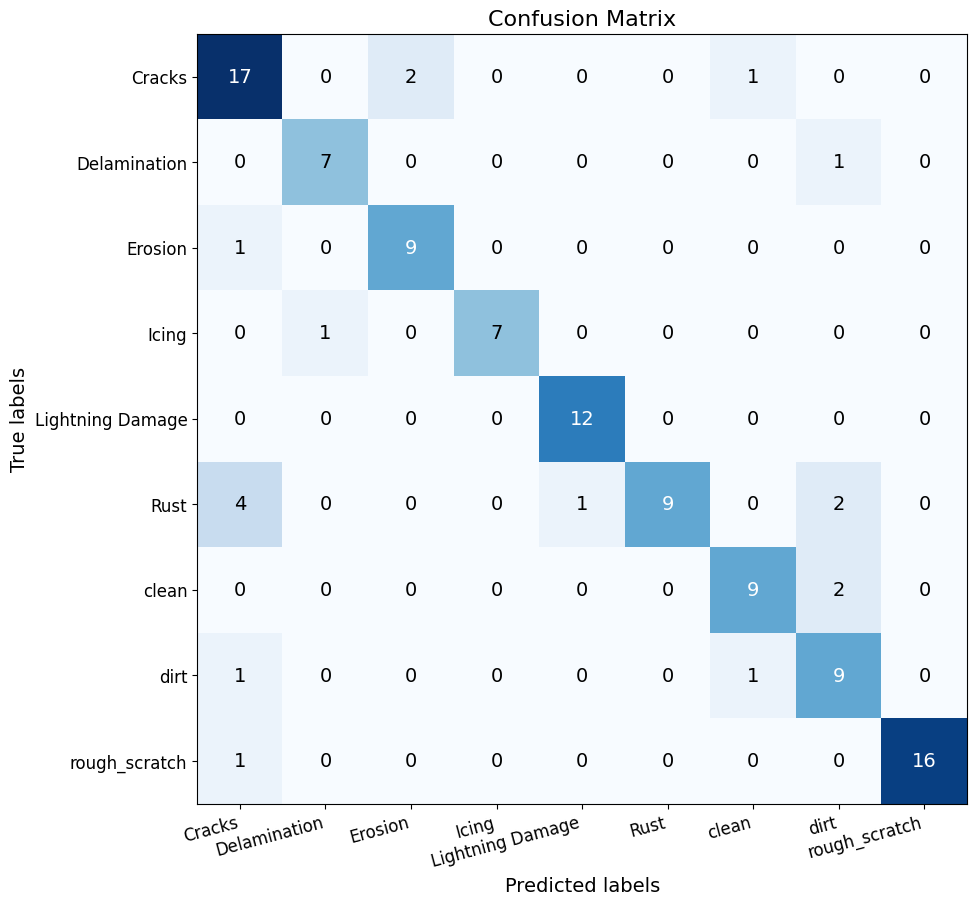

total_TP: 95.00
total_FN: 18.00
total_FP: 18.00
total_TN: 696.00
total_TPR: 0.84
total_FPR: 0.03
              Class  TP  TN FP FN       TPR       FPR
0            Cracks  17  52  7  3      0.85  0.118644
1      Delamination   7  90  1  1     0.875  0.010989
2           Erosion   9  83  2  1       0.9  0.023529
3             Icing   7  91  0  1     0.875       0.0
4  Lightning Damage  12  76  1  0       1.0  0.012987
5              Rust   9  79  0  7    0.5625       0.0
6             clean   9  82  2  2  0.818182   0.02381
7              dirt   9  79  5  2  0.818182  0.059524
8     rough_scratch  16  64  0  1  0.941176       0.0


In [44]:
df3 = detect_faultsdfaloneb(Inception_ResNet_V2_model, imglist,labels,img_size)

In [29]:
def detect_faultsdfalone(model, image_path, class_names, img_size=256, threshold=0.2):

    sepps = os.path.sep
    
    image_paths = get_image_paths(image_path)

    all_predictions = []

    # initialize confusion matrix
    confusion_matrix = np.zeros((len(class_names), len(class_names)), dtype=int)

    for i, path in enumerate(image_paths):
        image = cv2.imread(path)
        image = cv2.resize(image, (img_size, img_size))
        image = np.expand_dims(image, axis=0) / 255.
        
        start_time = time.time()
        predictions = model.predict(image)
        end_time = time.time()

        prediction_time = end_time - start_time
        prediction_time_in_sec = f"{prediction_time:.2f}"

        pred_labels = []
        confidences = []  

        for j, prediction in enumerate(predictions[0]):
            if prediction >= threshold:
                pred_labels.append(class_names[j])
                confidences.append(prediction)
                
        gt_label = path.split(os.path.sep)[-2]
        pred_label = ','.join(pred_labels) if pred_labels else 'None'
        confidence = ','.join([f'{c:.2f}' for c in confidences]) if confidences else 'None'

        # update confusion matrix
        gt_index = class_names.index(gt_label)
        for pred_label in pred_labels:
            pred_index = class_names.index(pred_label)
            confusion_matrix[gt_index][pred_index] += 1

        all_predictions.append((os.path.basename(path), gt_label, pred_label, confidence, prediction_time_in_sec))

    # calculate TP, TN, FP, and FN for each class
    tp = np.diag(confusion_matrix)
    fp = confusion_matrix.sum(axis=0) - tp
    fn = confusion_matrix.sum(axis=1) - tp
    tn = confusion_matrix.sum() - (tp + fp + fn)

    # calculate TPR and FPR for each class
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    # calculate overall TPR and FPR
    overall_tpr = np.mean(tpr)
    overall_fpr = np.mean(fpr)

    df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)'])
    
    df_split = df.assign(Ground_Truth_Label=df['Ground Truth Label']).assign(Predicted_Label=df['Predicted Label'].str.split(',')).explode('Predicted_Label')

    # Save the DataFrame to the CSV file
#     df.to_csv('SamplePredicted.csv', index=False)

#     print(f"TP: {tp:.2f}")
#     print(f"FP: {fp:.2f}")
#     print(f"TN: {tn:.2f}")
#     print(f"FN: {fn:.2f}")
#     print(f"TPR: {tpr:.2f}")
#     print(f"FPR: {fpr:.2f}")
#     print(f"overall_tpr: {overall_tpr:.2f}")
#     print(f"overall_fpr: {overall_fpr:.2f}")
    print("TP:",tp)
    print("FP:",fp)
    print("TN:",tn)
    print("FN:",fn)
    print("tpr:",tpr)
    print("fpr:",fpr)
    print("overall_tpr:",overall_tpr)
    print("overall_fpr:",overall_fpr)

    return df


In [30]:
detect_faultsdfalone(Inception_ResNet_V2_model, imglist,labels,img_size)

1/1 [==============================] - 0s 33ms/step
TP: [17  7  9  7 12  9  9  9 16]
FP: [7 1 2 0 1 0 2 5 0]
TN: [ 86 104 101 105 100  97 100  97  96]
FN: [3 1 1 1 0 7 2 2 1]
tpr: [0.85       0.875      0.9        0.875      1.         0.5625
 0.81818182 0.81818182 0.94117647]
fpr: [0.07526882 0.00952381 0.01941748 0.         0.00990099 0.
 0.01960784 0.04901961 0.        ]
overall_tpr: 0.8488933452168747
overall_fpr: 0.02030428261507422


,Image,Ground Truth Label,Predicted Label,Confidence,Prediction Time (sec)
0,resized_icing7.png,Icing,Icing,1.00,0.17
1,2C8A0875.JPG,Cracks,Cracks,1.00,0.14
2,DJI_0749_04_03_png.rf.bcd48bc6df94d2fe7cd7c52e...,Rust,Rust,"0.28,0.49",0.12
3,resized_delamination_gseo_5.jpg,Delamination,Delamination,0.99,0.06
4,DJI_0434_03_08_png.rf.824a0e33e104524afca7ddab...,dirt,dirt,"0.53,0.46",0.06
...,...,...,...,...,...
95,2C8A0239.JPG,rough_scratch,rough_scratch,1.00,0.10
96,bend1.png,Icing,Icing,1.00,0.07
97,DJI_0052_02_05_png.rf.32ad18eb9d7e66fead9dc038...,clean,clean,0.86,0.07
98,resized_delamination_gseo_11.jpg,Cracks,Erosion,0.86,0.07


In [33]:
def detect_faultsdfalone(model, image_path, class_names, img_size=256, threshold=0.2):
    
    sepps = os.path.sep
    
    image_paths = get_image_paths(image_path)

    all_predictions = []
    
    # Initialize the metrics
    total_tp = np.zeros(len(class_names))
    total_tn = np.zeros(len(class_names))
    total_fp = np.zeros(len(class_names))
    total_fn = np.zeros(len(class_names))

    for i, path in enumerate(image_paths):
        image = cv2.imread(path)
        image = cv2.resize(image, (img_size, img_size))
        image = np.expand_dims(image, axis=0) / 255.
        
        

        start_time = time.time()
        predictions = model.predict(image)
        end_time = time.time()

        prediction_time = end_time - start_time
        prediction_time_in_sec = f"{prediction_time:.2f}"

        pred_labels = []
        confidences = []  

        for j, prediction in enumerate(predictions[0]):
            if prediction >= threshold:
                pred_labels.append(class_names[j])
                confidences.append(prediction)
                
        gt_label = path.split(os.path.sep)[-2]
        pred_label = ','.join(pred_labels) if pred_labels else 'None'
        confidence = ','.join([f'{c:.2f}' for c in confidences]) if confidences else 'None'

        # Check if the prediction is correct or not and update the metrics
        for j, class_name in enumerate(class_names):
            if gt_label == class_name and class_name in pred_labels:
                total_tp[j] += 1
            elif gt_label != class_name and class_name not in pred_labels:
                total_tn[j] += 1
            elif gt_label != class_name and class_name in pred_labels:
                total_fp[j] += 1
            elif gt_label == class_name and class_name not in pred_labels:
                total_fn[j] += 1

        all_predictions.append((os.path.basename(path), gt_label, pred_label, confidence,prediction_time_in_sec))
            
    # df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence'])    
    df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)'])
    
    df_split = df.assign(Ground_Truth_Label=df['Ground Truth Label']).assign(Predicted_Label=df['Predicted Label'].str.split(',')).explode('Predicted_Label')

    # Save the DataFrame to the CSV file
    df.to_csv('SamplePredicted.csv', index=False)
    
    # Calculate the overall metrics
    total_samples = len(image_paths)
    tpr = total_tp.sum() / (total_tp.sum() + total_fn.sum())
    fpr = total_fp.sum() / (total_fp.sum() + total_tn.sum())
    
    
    print("total_tp:",total_tp)
    print("total_tn:",total_tn)
    print("total_fp:",total_fp)
    print("total_fn:",total_fn)
    print("tpr:",tpr)
    print("fpr:",fpr)
    # print("overall_tpr:",overall_tpr)
    # print("overall_fpr:",overall_fpr)

    return df


In [34]:
detect_faultsdfalone(Inception_ResNet_V2_model, imglist,labels,img_size)

1/1 [==============================] - 0s 28ms/step
total_tp: [17.  7.  9.  7. 12.  9.  9.  9. 16.]
total_tn: [74. 92. 89. 93. 87. 88. 89. 86. 84.]
total_fp: [7. 1. 2. 0. 1. 0. 2. 5. 0.]
total_fn: [2. 0. 0. 0. 0. 3. 0. 0. 0.]
tpr: 0.95
fpr: 0.0225


,Image,Ground Truth Label,Predicted Label,Confidence,Prediction Time (sec)
0,resized_icing7.png,Icing,Icing,1.00,0.16
1,2C8A0875.JPG,Cracks,Cracks,1.00,0.11
2,DJI_0749_04_03_png.rf.bcd48bc6df94d2fe7cd7c52e...,Rust,"Lightning Damage,Rust","0.28,0.49",0.06
3,resized_delamination_gseo_5.jpg,Delamination,Delamination,0.99,0.06
4,DJI_0434_03_08_png.rf.824a0e33e104524afca7ddab...,dirt,"Cracks,dirt","0.53,0.46",0.06
...,...,...,...,...,...
95,2C8A0239.JPG,rough_scratch,rough_scratch,1.00,0.07
96,bend1.png,Icing,Icing,1.00,0.07
97,DJI_0052_02_05_png.rf.32ad18eb9d7e66fead9dc038...,clean,clean,0.86,0.07
98,resized_delamination_gseo_11.jpg,Cracks,Erosion,0.86,0.06


In [8]:
df3

,Image,Ground Truth Label,Predicted Label,Confidence,Prediction Time (sec),TP,FP,TN,FN
0,2C8A0867.JPG,Cracks,Cracks,1.00,4.51,1.0,0.0,0.0,0.0
1,DJI_0702_08_07_png.rf.d5523e70de9a940309488f0a...,Lightning Damage,Lightning Damage,0.99,0.08,1.0,0.0,0.0,0.0
2,resized_delamination_9.jpg,Delamination,Delamination,1.00,0.07,1.0,0.0,0.0,0.0
3,Icing2.png,Icing,Icing,1.00,0.08,1.0,0.0,0.0,0.0
4,erosion_msma_45.jpg,Erosion,Erosion,1.00,0.08,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,resized_6152883490241energies-14-05974-g004-55...,Lightning Damage,Lightning Damage,1.00,0.06,1.0,0.0,0.0,0.0
96,DJI_0325_07_03_png.rf.3c258e3352b5729c7ad1ff13...,clean,"clean,dirt","0.69,0.29",0.07,1.0,1.0,0.0,0.0
97,images (2).jpeg,Erosion,Erosion,0.99,0.07,1.0,0.0,0.0,0.0
98,2C8A0726.jpg,Cracks,Cracks,1.00,0.06,1.0,0.0,0.0,0.0


In [9]:
def detect_faultsdfalone(model, image_path, class_names, img_size=256, threshold=0.2):    
    sepps = os.path.sep
    
    image_paths = get_image_paths(image_path)

    all_predictions = []

    for i, path in enumerate(image_paths):
        image = cv2.imread(path)
        image = cv2.resize(image, (img_size, img_size))
        image = np.expand_dims(image, axis=0) / 255.

        start_time = time.time()
        predictions = model.predict(image)
        end_time = time.time()

        prediction_time = end_time - start_time
        prediction_time_in_sec = f"{prediction_time:.2f}"

        pred_labels = []
        confidences = []  

        for j, prediction in enumerate(predictions[0]):
            if prediction >= threshold:
                pred_labels.append(class_names[j])
                confidences.append(prediction)

        gt_label = path.split(os.path.sep)[-2]
        pred_label = ','.join(pred_labels) if pred_labels else 'None'
        confidence = ','.join([f'{c:.2f}' for c in confidences]) if confidences else 'None'

        all_predictions.append((os.path.basename(path), gt_label, pred_label, confidence,prediction_time_in_sec))

    df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)'])

    df_split = df.assign(Ground_Truth_Label=df['Ground Truth Label']).assign(Predicted_Label=df['Predicted Label'].str.split(',')).explode('Predicted_Label')

    # Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
    TP = len(df_split[(df_split['Ground_Truth_Label'] == df_split['Predicted_Label']) & (df_split['Ground_Truth_Label'] != 'None')])
    TN = len(df_split[(df_split['Ground_Truth_Label'] == 'None') & (df_split['Predicted_Label'] == 'None')])
    FP = len(df_split[(df_split['Ground_Truth_Label'] != df_split['Predicted_Label']) & (df_split['Predicted_Label'] != 'None')])
    FN = len(df_split[(df_split['Ground_Truth_Label'] != df_split['Predicted_Label']) & (df_split['Predicted_Label'] == 'None')])

    # Calculate accuracy, misclassification, precision, recall, and specificity
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    misclassification = 1 - accuracy
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    specificity = TN / (TN + FP) if TN + FP > 0 else 0

    # Add accuracy, misclassification, precision, recall, and specificity as new columns to the dataframe
    df['TP'] = TP
    df['TN'] = TN
    df['FP'] = FP
    df['FN'] = FN
    df['Accuracy'] = accuracy
    df['Misclassification'] = misclassification
    df['Precision'] = precision
    df['Recall'] = recall
    df['Specificity'] = specificity

    # Save the DataFrame to the CSV file
    df.to_csv('SamplePredicted.csv', index=False)

    return df


In [12]:
detect_faultsdfalone(Inception_ResNet_V2_model, imglist,labels,img_size)

1/1 [==============================] - 0s 32ms/step


,Image,Ground Truth Label,Predicted Label,Confidence,Prediction Time (sec),TP,TN,FP,FN,Accuracy,Misclassification,Precision,Recall,Specificity
0,2C8A1596.JPG,rough_scratch,rough_scratch,1.00,0.11,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0
1,resized_delamination_gseo_27.jpg,Cracks,Erosion,0.82,0.10,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0
2,icing7.png,Icing,Icing,1.00,0.08,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0
3,resized_delamination_gseo_11.jpg,Cracks,Erosion,0.86,0.08,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0
4,DJI_0691.JPG,clean,clean,0.74,0.08,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,DJI_0702_08_07_png.rf.d5523e70de9a940309488f0a...,Lightning Damage,Lightning Damage,0.99,0.08,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0
96,IMG_8899.JPG,Delamination,"Delamination,dirt","0.33,0.64",0.07,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0
97,erosion_saqh_11.jpg,Erosion,Erosion,1.00,0.08,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0
98,DJI_0633_07_04_png.rf.94b0876c94abb75029700b5e...,dirt,"clean,dirt","0.67,0.29",0.07,95,0,18,0,0.840708,0.159292,0.840708,1.0,0.0


In [22]:
import pandas as pd

# create an empty DataFrame with the desired columns
columns = ['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)']
df = pd.DataFrame(columns=columns)

for i in range(1, 10):
    # call detect_faultsdfalone() and store the result in a temporary DataFrame
    temp_df = detect_faultsdfalone(Inception_ResNet_V2_model, imglist, labels, img_size)

    # add a new column 'runNum' with the value of i
    temp_df['runNum'] = i

    # append the temporary DataFrame to the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)
    # df = df.append(temp_df, ignore_index=True)

df

1/1 [==============================] - 0s 36ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
1/1 [==============================] - 0s 32ms/step


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


1/1 [==============================] - 0s 34ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
1/1 [==============================] - 0s 31ms/step


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


1/1 [==============================] - 0s 38ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
1/1 [==============================] - 0s 34ms/step


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


1/1 [==============================] - 0s 36ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
1/1 [==============================] - 0s 34ms/step


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


1/1 [==============================] - 0s 32ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
1/1 [==============================] - 0s 35ms/step


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


1/1 [==============================] - 0s 43ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
1/1 [==============================] - 0s 35ms/step


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


1/1 [==============================] - 0s 33ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
1/1 [==============================] - 0s 41ms/step


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


1/1 [==============================] - 0s 36ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
1/1 [==============================] - 0s 34ms/step


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


1/1 [==============================] - 0s 40ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18


C:\Users\scrwh\AppData\Local\Temp\ipykernel_42488\111752350.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df, ignore_index=True)


,Image,Ground Truth Label,Predicted Label,Confidence,Prediction Time (sec),runNum
0,2C8A0867.JPG,Cracks,Cracks,1.00,0.09,1.0
1,DJI_0702_08_07_png.rf.d5523e70de9a940309488f0a...,Lightning Damage,Lightning Damage,0.99,0.08,1.0
2,resized_delamination_9.jpg,Delamination,Delamination,1.00,0.08,1.0
3,Icing2.png,Icing,Icing,1.00,0.08,1.0
4,erosion_msma_45.jpg,Erosion,Erosion,1.00,0.08,1.0
...,...,...,...,...,...,...
895,resized_6152883490241energies-14-05974-g004-55...,Lightning Damage,Lightning Damage,1.00,0.08,9.0
896,DJI_0325_07_03_png.rf.3c258e3352b5729c7ad1ff13...,clean,"clean,dirt","0.69,0.29",0.07,9.0
897,images (2).jpeg,Erosion,Erosion,0.99,0.08,9.0
898,2C8A0726.jpg,Cracks,Cracks,1.00,0.08,9.0


In [22]:
def detect_faultsdfalone(model, image_path, class_names, img_size=256, threshold=0.2):    
    sepps = os.path.sep
    
    image_paths = get_image_paths(image_path)

    all_predictions = []

    for i, path in enumerate(image_paths):
        image = cv2.imread(path)
        image = cv2.resize(image, (img_size, img_size))
        image = np.expand_dims(image, axis=0) / 255.

        start_time = time.time()
        predictions = model.predict(image)
        end_time = time.time()

        prediction_time = end_time - start_time
        prediction_time_in_sec = f"{prediction_time:.2f}"

        pred_labels = []
        confidences = []  

        for j, prediction in enumerate(predictions[0]):
            if prediction >= threshold:
                pred_labels.append(class_names[j])
                confidences.append(prediction)

        gt_label = path.split(os.path.sep)[-2]
        pred_label = ','.join(pred_labels) if pred_labels else 'None'
        confidence = ','.join([f'{c:.2f}' for c in confidences]) if confidences else 'None'

        all_predictions.append((os.path.basename(path), gt_label, pred_label, confidence,prediction_time_in_sec))

    df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)'])

    df_split = df.assign(Ground_Truth_Label=df['Ground Truth Label']).assign(Predicted_Label=df['Predicted Label'].str.split(',')).explode('Predicted_Label')

    true_positives = len(df_split[(df_split['Ground_Truth_Label'] == df_split['Predicted_Label']) & (df_split['Ground_Truth_Label'] != 'None')])
    true_negatives = len(df_split[(df_split['Ground_Truth_Label'] == 'None') & (df_split['Predicted_Label'] == 'None')])
    false_positives = len(df_split[(df_split['Ground_Truth_Label'] != df_split['Predicted_Label']) & (df_split['Ground_Truth_Label'] == 'None')])
    false_negatives = len(df_split[(df_split['Ground_Truth_Label'] != df_split['Predicted_Label']) & (df_split['Predicted_Label'] == 'None')])
    
    # Add accuracy, misclassification, precision, recall, and specificity as new columns to the dataframe
    # df['TP'] = true_positives
    # df['TN'] = true_negatives
    # df['FP'] = false_positives
    # df['FN'] = false_negatives

    accuracy = (true_positives + true_negatives) / len(df_split)
    misclassification = (false_positives + false_negatives) / len(df_split)
    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    specificity = true_negatives / (true_negatives + false_positives) if true_negatives + false_positives > 0 else 0

    df1 = pd.DataFrame({
        'Accuracy': [accuracy],
        'Misclassification': [misclassification],
        'Precision': [precision],
        'Recall/Sensitivity': [recall],
        'Specificity': [specificity]
    })

    # Save the DataFrames to the CSV files
    df.to_csv('SamplePredicted.csv', index=False)
    df1.to_csv('SampleMetrics.csv', index=False)

    return df, df1


In [23]:
detect_faultsdfalone(Inception_ResNet_V2_model, imglist,labels,img_size)

1/1 [==============================] - 0s 43ms/step


(                                                Image Ground Truth Label  \
 0                                        2C8A1596.JPG      rough_scratch   
 1                    resized_delamination_gseo_27.jpg             Cracks   
 2                                          icing7.png              Icing   
 3                    resized_delamination_gseo_11.jpg             Cracks   
 4                                        DJI_0691.JPG              clean   
 ..                                                ...                ...   
 95  DJI_0702_08_07_png.rf.d5523e70de9a940309488f0a...   Lightning Damage   
 96                                       IMG_8899.JPG       Delamination   
 97                                erosion_saqh_11.jpg            Erosion   
 98  DJI_0633_07_04_png.rf.94b0876c94abb75029700b5e...               dirt   
 99                                  Blad2_Orignal.jpg               Rust   
 
       Predicted Label Confidence Prediction Time (sec)  TP  TN  FP  FN  


In [20]:
def detect_faultsdfalone(model, image_path, class_names, img_size=256, threshold=0.2):    
    sepps = os.path.sep
    
    image_paths = get_image_paths(image_path)

    all_predictions = []

    for i, path in enumerate(image_paths):
        image = cv2.imread(path)
        image = cv2.resize(image, (img_size, img_size))
        image = np.expand_dims(image, axis=0) / 255.
        
        start_time = time.time()
        predictions = model.predict(image)
        end_time = time.time()

        prediction_time = end_time - start_time
        prediction_time_in_sec = f"{prediction_time:.2f}"

        pred_labels = []
        confidences = []  

        for j, prediction in enumerate(predictions[0]):
            if prediction >= threshold:
                pred_labels.append(class_names[j])
                confidences.append(prediction)
                
        gt_label = path.split(os.path.sep)[-2]
        pred_label = ','.join(pred_labels) if pred_labels else 'None'
        confidence = ','.join([f'{c:.2f}' for c in confidences]) if confidences else 'None'

        all_predictions.append((os.path.basename(path), gt_label, pred_label, confidence,prediction_time_in_sec))
            
    df = pd.DataFrame(all_predictions, columns=['Image', 'Ground Truth Label', 'Predicted Label', 'Confidence', 'Prediction Time (sec)'])
    
    df_split = df.assign(Ground_Truth_Label=df['Ground Truth Label']).assign(Predicted_Label=df['Predicted Label'].str.split(',')).explode('Predicted_Label')
    
    # initialize TP, FP, TN, and FN for each image to 0
    df_split['TP'] = 0
    df_split['FP'] = 0
    df_split['TN'] = 0
    df_split['FN'] = 0
    
    for idx, row in df_split.iterrows():
        if row['Ground_Truth_Label'] == row['Predicted_Label']:
            if row['Ground_Truth_Label'] == class_names[0]:
                df_split.at[idx, 'TP'] = 1
            else:
                df_split.at[idx, 'TN'] = 1
        else:
            if row['Ground_Truth_Label'] == class_names[0]:
                df_split.at[idx, 'FN'] = 1
            else:
                df_split.at[idx, 'FP'] = 1
    
    # calculate TPR and FPR
    TP = df_split['TP'].sum()
    FP = df_split['FP'].sum()
    TN = df_split['TN'].sum()
    FN = df_split['FN'].sum()
    
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    
    
    count = len(df_split[df_split['Ground_Truth_Label'] == df_split['Predicted_Label']])
    countb = len(df_split[df_split['Ground_Truth_Label'] != df_split['Predicted_Label']])
    # count number of rows with one predicted label
    one_label = (df['Predicted Label'].str.count(',') == 0).sum()
    # count number of rows with more than one predicted label
    more_labels = (df['Predicted Label'].str.count(',') > 0).sum()
    
    total_Images = df.shape[0]
    total_Predictions = df_split.shape[0]
    # Assuming the variables are already defined
    print(f"\n\n\nNumber of rows with one predicted label: {one_label}")
    print(f"Number of rows with more than one predicted label: {more_labels}")
    print(f"Total Images label: {total_Images}")
    print(f"Total predicted label: {total_Predictions}")

    print(f"Total predictions that match each Ground Truth: {count}")
    print(f"Total predictions that do not match each Ground Truth: {countb}")

    # Calculate percentage of accuracy and wrong predictions
    accuracy = (count / total_Predictions) * 100
    wrong_predictions = (countb / total_Predictions) * 100

    print(f"Percentage of accuracy: {accuracy:.2f}%")
    print(f"Percentage of wrong predictions: {wrong_predictions:.2f}%\n\n")
    
    
    
    print(f"True Positives: {TP}")
    print(f"False Positives: {FP}")
    print(f"True Negatives: {TN}")
    print(f"False Negatives: {FN}")
    
    print(f"True Positive Rate (TPR): {TPR:.2f}")
    print(f"False Positive Rate (FPR): {FPR:.2f}")

    # Save the DataFrame to the CSV file
    df.to_csv('SamplePredicted.csv', index=False)

    return df


In [21]:
detect_faultsdfalone(Inception_ResNet_V2_model, imglist,labels,img_size)

1/1 [==============================] - 0s 33ms/step
Number of rows with one predicted label: 87
Number of rows with more than one predicted label: 13
Total predictions that match each Ground Truth: 95
Total predictions that do not match each Ground Truth: 18
True Positives: 18
False Positives: 25
True Negatives: 88
False Negatives: 4
True Positive Rate (TPR): 0.82
False Positive Rate (FPR): 0.22


,Image,Ground Truth Label,Predicted Label,Confidence,Prediction Time (sec)
0,2C8A1596.JPG,rough_scratch,rough_scratch,1.00,0.14
1,resized_delamination_gseo_27.jpg,Cracks,Erosion,0.82,0.12
2,icing7.png,Icing,Icing,1.00,0.06
3,resized_delamination_gseo_11.jpg,Cracks,Erosion,0.86,0.07
4,DJI_0691.JPG,clean,clean,0.74,0.06
...,...,...,...,...,...
95,DJI_0702_08_07_png.rf.d5523e70de9a940309488f0a...,Lightning Damage,Lightning Damage,0.99,0.08
96,IMG_8899.JPG,Delamination,"Delamination,dirt","0.33,0.64",0.07
97,erosion_saqh_11.jpg,Erosion,Erosion,1.00,0.07
98,DJI_0633_07_04_png.rf.94b0876c94abb75029700b5e...,dirt,"clean,dirt","0.67,0.29",0.08
